In [ ]:
%matplotlib inline

# ADD necessary imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics
from scipy import ndimage
# backwards compatabliity
from __future__ import print_function
from __future__ import division
# own adds
import scipy
import skimage
from random import randint
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools

# dunction to load images amd labels of the original MNIST dataset
from mnist import load_mnist

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
# name of the image to load
filename = 'red-fox.jpg'

# load the image
# we do this in one step in the next interpreted statement
#img1 = 

# transfer the image into numpy ndarray (depending on the function, this is one step with prev.one)
img1 = ndimage.imread(filename)

# get image dimensions
dims = img1.shape

# get image size
s = img1.size

print('Loaded: {}'.format(filename))
print('Image shape: {}'.format(dims))
print('Image size: {}'.format(s))

# crop a random (h x w) patch from the image
h = 227
w = 227
img1_cut = img1[0:h, 0:w]  # we just used the offset 0,0 (easier)

# resize initial image to the size (h x w x c), c - number of channels
c = 3
img1_resize = scipy.misc.imresize(img1, (h, w, c))

# convert the original image into the gray scale
img1_gray = ndimage.imread(filename, mode='L')  # we convert the image while loading it again

# compute image gradient in x-direction: convolve image with the correct sobel filter (HINT check ndimage from scipy)
sfilter = ndimage.sobel(img1, axis=1)  # our x axis is axis=1, as well this function will as well convolve the sobel filter
img1_dx = sfilter

# apply an arbitrary affine transformation (rotation, translation) to the gray scale image
img1_transf = ndimage.rotate(img1, 45)

# show all resuls (6 images in a single figure)
plt.subplot(2,3,1)
plt.imshow(img1)
plt.title("Loaded JPG image")
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(img1_cut)
plt.title("Cut image")
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(img1_resize)
plt.title("Resized image")
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(img1_gray, cmap='Greys_r')
plt.title("Gray image")
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(img1_dx, cmap='Greys_r')
plt.title("X-Gradient image")
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(img1_transf)
plt.title("Transformed image")
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'red-fox.jpg'

trainset shape:  (60000, 28, 28)
testset shape:  (10000, 28, 28)


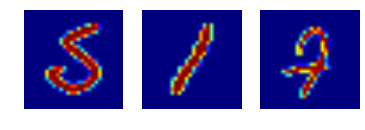

new trainset shape:  (60000, 784)
new testset shape:  (10000, 784)


/home/ivukotic/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# load MNIST data set (only selected digits, i.e. 3,8,9 )
digits = [3,8,9]
digits = np.arange(10)

trainset, trainlabels = load_mnist(dataset="training", digits=digits, path="")
testset, testlabels = load_mnist(dataset="testing", digits=digits, path="")

# reshape arrays with the labels into 1d arrays
trainlabels = trainlabels.reshape((len(trainlabels)))
testlabels = testlabels.reshape((len(testlabels)))

print('trainset shape: ', trainset.shape)
print('testset shape: ', testset.shape)

# visualize three random sample from the dataset:
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.imshow(trainset[randint(0,500)])
    plt.axis('off')
plt.show()

# consider image pixels as features, for that reshape the images in 1d vectors
trainset_vec = trainset.reshape((trainset.shape[0], trainset.shape[1]*trainset.shape[2]))
print('new trainset shape: ', trainset_vec.shape)
testset_vec = testset.reshape((testset.shape[0], testset.shape[1]*testset.shape[2]))
print('new testset shape: ', testset_vec.shape)

# normalize data to [-1, 1]-range
scaler1 = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True)
trainset_vec = scaler1.fit_transform(trainset_vec)
testset_vec = scaler1.transform(testset_vec)   # make sure we use the same transformation!

# create a SVM classifier
classifier = svm.SVC()

# train classifier check (see the svm.SVC definition)
classifier.fit(trainset_vec, trainlabels)

# test classifier on the validation set (see the svm.SVC definition)
testlabels_pred = classifier.predict(testset_vec)

# classification accuracy on the validation set
Acc = classifier.score(testset_vec, testlabels)
print("Accuracy on the validation set: %0.2f" % (100*Acc))

# confusion matrix ( HINT see metrics from sklearn)
confmatrix = confusion_matrix(testlabels, testlabels_pred)
print('Confusion matrix:\n ', confmatrix)
np.set_printoptions(precision=2)
# source for the code of this fancy plotting function: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
plot_confusion_matrix(confmatrix, digits, normalize=False)